#Importing libraries

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Connect to drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Testset preprocessing

In [48]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/notebook_data_and_output/dataset3/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 64,
    image_size = (256, 256),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 96 files belonging to 3 classes.


#Loading model

In [49]:
cnn = tf.keras.models.load_model("/content/drive/My Drive/MarnusColabs/my_big_model.keras")

##Visualization and Performing Prediction on single image

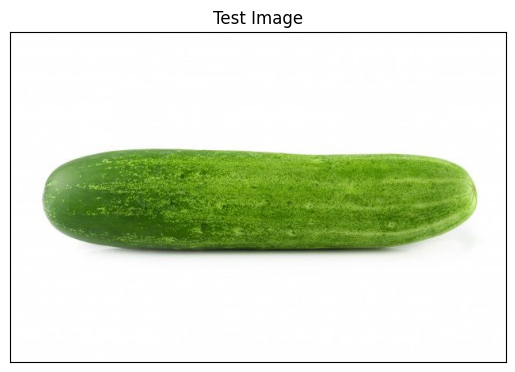

In [50]:
import cv2
image_path = "/content/drive/MyDrive/Fruit_Detector_AI/TestGeneralisation/cucumber/cucumber.jpg"
image = cv2.imread(image_path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [51]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting  single image to batch
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


In [52]:
print(predictions)
print(max(predictions[0]))

[[2.7480135e-10 5.5341629e-17 1.0000000e+00]]
1.0


In [53]:
test_set.class_names

['banana', 'cucumber', 'peach']

In [54]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

2


In [55]:
for i, prediction in enumerate(predictions[0]):
  print(f"{test_set.class_names[i]}: {prediction*100:.2f}%")

banana: 0.00%
cucumber: 0.00%
peach: 100.00%


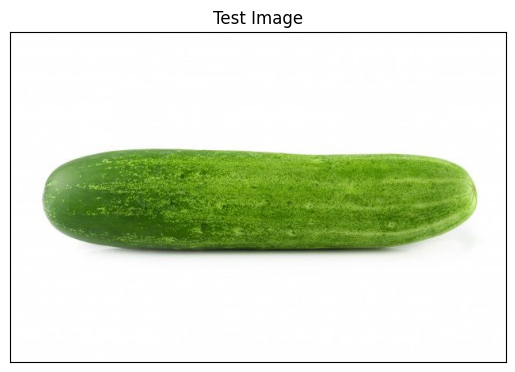

In [56]:
#Display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
#Single prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))
print("Confidence: {:.2f} %".format(predictions[0][result_index[0][0]]*100))

It is a peach
Confidence: 100.00 %
